### Test np.matmal's broadcasting rules
- Src: [official doc](https://numpy.org/doc/stable/reference/generated/numpy.matmul.html)

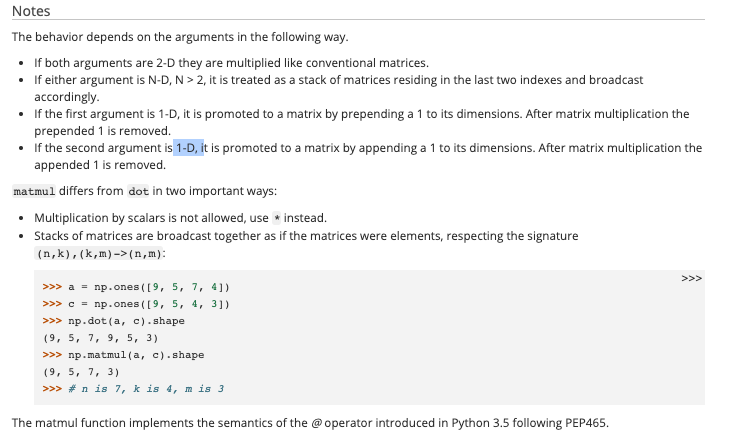

In [ ]:
import numpy as np
import torch

In [ ]:
a = np.ones(3); #a[1:] = 0;
b = np.ones(2); b[1]=0;
W = np.ones((4,3,2))
for k in range(len(W)):
    W[k,:,:] = k
    

In [ ]:
Wb = W@b[..., np.newaxis]
print((W@b).shape)
print((W@b)[..., np.newaxis].shape)
# print((W@b)[..., np.newaxis])

In [ ]:
out = np.matmul(a,Wb)
print(out.shape)
print(out)

In [ ]:
a.shape


In [ ]:
Wb.ndim


In [ ]:
X = torch.tensor([[1.,-1.],
                 [0,10]])
mu0 = np.array([2.,2.])
sigma0 = np.eye(2)
mu1 = np.array([-2,-2])
sigma1 = np.eye(2)
pi = np.array([0.5,0.5])
R = torch.tensor([[1.0, -1.0]])

In [ ]:
X

In [ ]:
R


In [ ]:
X*R[:,0]

In [ ]:
(X*R[:,0]).sum(0)

In [ ]:
torch.Tensor.ravel()

In [ ]:
X*R[:,1]

## Another example
Nov 20, 2020


In [ ]:
K,I,J = 10,3,4
a = torch.ones((1,I))
b = torch.ones((1,J)).T
a,b

In [ ]:
W = torch.zeros((K,I,J))
W[0] = 1
W0 = W[0]

In [ ]:
a.shape, W0.shape, b.shape

In [ ]:
torch.matmul(a,W0).matmul(b).shape

In [ ]:
a.flatten().shape

In [ ]:
torch.matmul(a.flatten(), W0).shape

In [ ]:
torch.matmul(W0, b.T.flatten()).shape

------------------------------------------------------------------------

In [ ]:
a = torch.ones((1,I))
W = torch.zeros((2,I,J))
W[1] = 1.0
out = a.matmul(W)
print(a)
print(W)
print(a.shape, W.shape, out.shape)
print(out)

In [ ]:
b = torch.ones((1,J)).T
out = a.matmul(W).matmul(b)
print(W.shape, b.shape, out.shape)
print(out)

------------------------------------------------------------------------


In [ ]:
S = 2 # Number of styles
I,J,K = 3,4,5
A = torch.ones(S,1,1,I)
A[1] = -1.
A

In [ ]:
W = torch.zeros((K,I,J))

In [ ]:
for i in range(len(W)):
    W[i] = i
print(W)

In [ ]:
out = A.matmul(W)
print(A.shape, W.shape, out.shape)

In [ ]:
out

In [ ]:
b = torch.ones((1,1,J,1))
print(out.shape, b.shape)

out2 = out.matmul(b)
print(out2.shape)
out2

In [ ]:
C = 3
B = torch.ones((C,1,1,J,1)) #C x (S,K,J,1)
for i in range(len(B)):
    B[i] *= i+1
print(B)

out2 = out.matmul(B) # C,S,K, 1,1

print(B.shape, out2.shape)


In [ ]:
B[[0].shape

In [ ]:
B.shape

In [ ]:
out_b = out.matmul(b)
out_B = out.matmul(B)

print(torch.equal(out_b, out_B[0]))

In [ ]:
out_b1 = out.matmul(b*2.)
print(torch.equal(out_b1, out_B[1]))

In [ ]:
out_b2 = out.matmul(b*3.)
print(torch.equal(out_b2, out_B[2]))

In summary, for vectorized tensor multiplcation:
- A: a tensor of style vectors; (S,1,1,I)
- W: a tensor of weights, invariant to style and content variables; (K,I,J)
- B: a tensor of content vectors; (C,1,1,1,J)

---
- `A.matmul(W)`: for each style of shape (1,1,J), use the same weight tensor W (K,I,J)
    - (1,1,J) --> broadcasted to (K,1,I) --> Multiplied with (K,I,J) --> output (K,1,J)
- `out = A.matmul(W) # (S,K,1,J)`
---
- `out.matmul(B)`:  each content vector b in B is of shape (1,J). Use this same content vector to all K dimensions and for all style in S. This is done by setting the dimensions corresponding to S and K to be 1 --> (1,1,(1,J))
    - Now, we prepend the new dimension for multiple number of content vectors: (C, 1,1,1,J)
    
- `out2 = out.matmul(B)`: of shape (C,S,K,1,1)



In [ ]:
a.shape

In [ ]:
W.shape


In [ ]:
a.matmul(W).shape


In [ ]:
b.shape

In [ ]:
b[0,0].shape

In [ ]:
a.matmul(W[0]).matmul(b[0,0]).shape


In [ ]:
a.matmul(W).matmul(b[0,0]).shape

In [ ]:
torch.to?

In [ ]:
torch.dtype?

In [ ]:
torch.Tensor.to()